In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [33]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [34]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-02-10,78.119225,78.119225,76.248546,76.328715,109348800
2020-02-11,77.647942,78.690182,77.429292,78.617301,94323200
2020-02-12,79.491882,79.496739,78.099800,78.099800,113730400
2020-02-13,78.925804,79.253782,78.556529,78.760603,94747600
2020-02-14,78.945267,79.195501,78.435079,78.894243,80113600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [49]:
# Normalisation des prix
scaler = MinMaxScaler()
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

In [50]:
# Création des séquences pour le modèle RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [51]:
seq_length = 10  # Nombre de jours utilisés pour prédire le jour suivant
train_size=0.8

In [52]:
# Split data into train and test sets
train_data = df['Scaled_Close'].values[:int(len(df) * train_size)]
test_data = df['Scaled_Close'].values[int(len(df) * train_size):]

In [53]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [54]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [55]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.compile(optimizer='adam', loss='mse')

In [57]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8362e-04 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4000e-04 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4275e-04 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2589e-04 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1930e-04 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9423e-04 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0903e-04 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0395e-04 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9083e-04 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9110e-04 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2954e-04 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0464e-04 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8763e-04 
Epoch 15/20
32/32 ━━━━━━━━━━

In [58]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [59]:
df['Predicted_Close'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [60]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [61]:
df.loc[train_index, 'Predicted_Close'] = train_predictions
df.loc[test_index, 'Predicted_Close'] = test_predictions

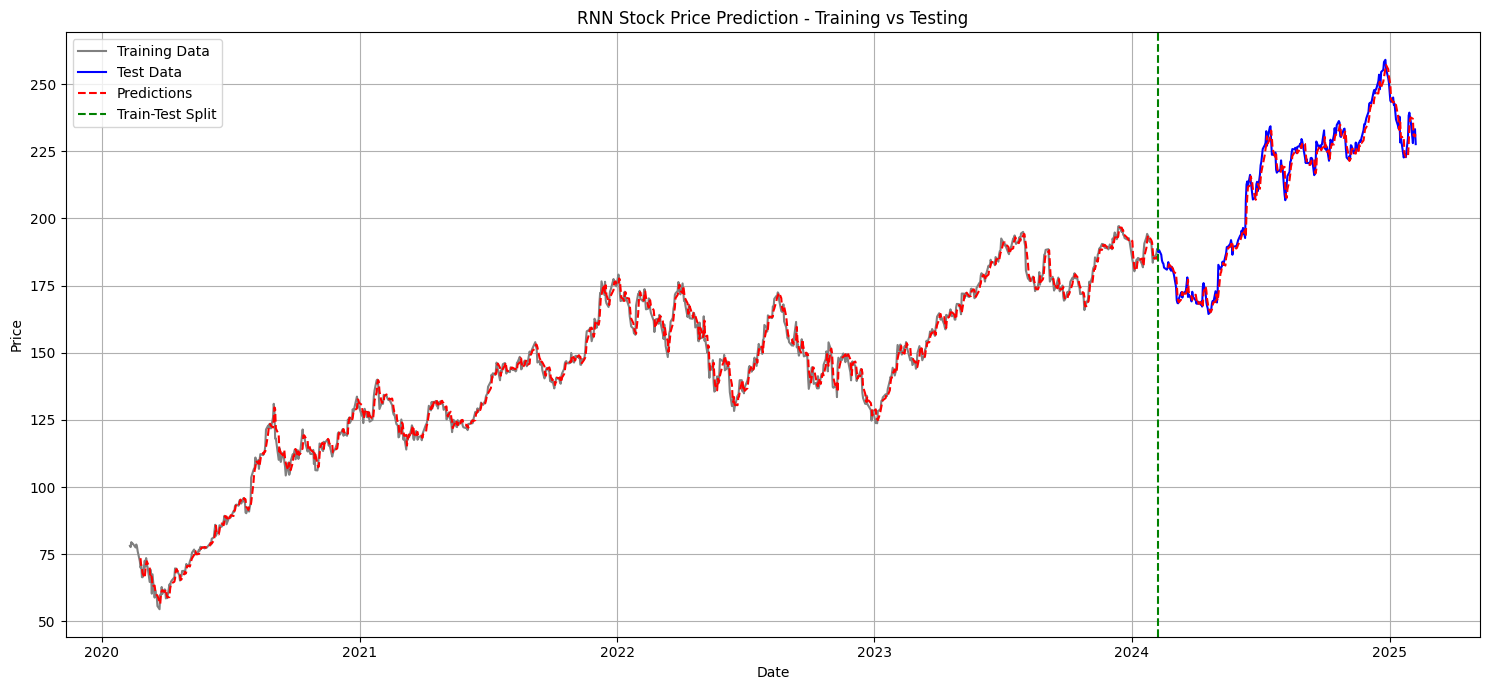

In [62]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("RNN Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

**Calculation et affichage des metrics de  performence**

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [64]:
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

In [65]:
train_actual = df['Close'][seq_length:int(len(df) * train_size)]
train_pred = df['Predicted_Close'][seq_length:int(len(df) * train_size)].dropna()
train_mse, train_rmse, train_mae = calculate_metrics(train_actual, train_pred)

In [66]:
test_actual = df['Close'][int(len(df) * train_size) + seq_length:]
test_pred = df['Predicted_Close'][int(len(df) * train_size) + seq_length:].dropna()
test_mse, test_rmse, test_mae = calculate_metrics(test_actual, test_pred)

In [67]:
print("\nTraining Set Metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")


Training Set Metrics:
MSE: 7.37
RMSE: 2.72
MAE: 2.06

Test Set Metrics:
MSE: 12.29
RMSE: 3.51
MAE: 2.71
